# Project: Investigating the No-show Appointment Booking Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The available dataset has information from 100k medical appointments in Brazil and is focused on the question of whether or not patients showed up for their appointment. The data is available through [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). The data dictionary is presented below (as gotten from [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)):

|S/N|Column|Description
| -: | -: | -: |
|01|PatientId|Identification of a patient |
|02|AppointmentID | Identification of each appointment |
|03|Gender | Male or Female |
|04|AppointmentDay | The day they have to visit the doctor. |
|05|ScheduleDay | The day someone called or registered the appointment |
|06|Age | How old is the patient |
|07|Neighbourhood | Where the appointment takes place |
|08|Scholarship | True of False |
|09|Hipertension | True or False |
|10|Diabetes | True or False |
|11|Alcoholism | True or False |
|12|Handcap | True or False |
|13|SMS_received | 1 or more messages sent to the patient |
|14|No-show | True or False |


### Question(s) for Analysis

1. Does receiving SMS increase a patient's chance of making it to their appointment?
2. Does the presence of a medical condition increase people's chances of meeting up with their appointments?
3. Does time between booking an appointment and your given date affect the visit?


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# load data and preview
no_show = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
no_show.shape

(110527, 14)

In [4]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
no_show.duplicated().sum()

0

In [7]:
no_show.isnull().any().sum()

0

- The <mark>PatientId</mark> are in exponent which we would have to convert to string so the entire value would be available. It is a category used to identify individuals instead of their personal names. This label can be duplicated since an individual can have multiple appointments.
- <mark>AppointmentID</mark> is also a label unique to every single booking event. It must not be duplicated.
- Based on the data dictionary, <mark>No-show</mark> has to be renamed to <mark>showed_up</mark> and have **No** mapped to 1 and **Yes** mapped to 0.
- <mark>ScheduleDay</mark> and <mark>AppointmentDay</mark> are strings instead of datetime. 
- The column labels would be changed to lowercase for consistency.
- There are a total of 110527 rows with no null values and no duplicates. 
- Majority of the patients are 37 years old and the highest age is 115 years old. 
- There are some ages of negative values (-1) which would be dropped because age cannot be negative.
- Of all the conditions (Hypertension, Diabetes and Alcoholism), the highest are those with hypertension (19.7%).

In [8]:
# percentage hypertensive
(no_show["Hipertension"].sum()/110527)*100

19.72459218109602

### Data Cleaning

Several operations are going to be carried out on the dataset to clean it up:

- All column names would be changed to lowercase for uniformity
- Rename column <mark>No-show</mark> to <mark>showed_up</mark> and convert <mark>No to 1</mark> and <mark>Yes to 0</mark>
- <mark>Patient ID</mark> and <mark>AppointmentID</mark> will be changed to strings because they are labels.
- Convert <mark>Appointment Day</mark> and <mark>Schedule Day</mark> to datetime objects so that we can calculate time intervals.

In [3]:
# rename the column to lowercase for uniformity.
no_show.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [4]:
# change Yes and No of result to 0 and 1
no_show['no-show'] = no_show["no-show"].map({'Yes':0, 'No':1})

In [5]:
# rename no-show to showed_up
no_show.rename(columns={"no-show":"showed_up"}, inplace=True)

In [6]:
no_show.patientid.nunique()

62299

In [7]:
no_show.appointmentid.nunique()

110527

There are fewer unique <mark>patient IDs</mark> than appointments. We can also see that all <mark>appointmentIDs</mark> are unique. However, patients are likely to have more than one appointments at different times. 
Patient ID and Appointment ID are categories so, they will be converted to strings rather than floats and integers.

In [6]:
# convert patientID and appointmentID to string
no_show["patientid"] = no_show.patientid.astype('int64').astype(str)  #first to int, then str
no_show["appointmentid"] = no_show.appointmentid.astype(str)

In [7]:
# convert Schedule day and Appointment day to datetime
no_show['scheduledday']=pd.to_datetime(no_show['scheduledday'])
no_show['appointmentday']=pd.to_datetime(no_show['appointmentday'])

In [11]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  showed_up     

In [12]:
# the description earlier revealed that some ages are negative. 
# let's check for those less than 1
zero_age = no_show[no_show.age < 1]
zero_age.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
59,71844284745331,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,1
63,236623344873175,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,1
64,188517384712787,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,1
65,271881817799985,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,1
67,86471282513499,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,1


In [13]:
# inspect two rows to confirm the presence of duplicate values hidden under different appointmentID
no_show.loc[109647:109650]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
109647,56352583933331,5691391,M,2016-05-12 12:35:04+00:00,2016-06-08 00:00:00+00:00,0,FORTE SÃO JOÃO,0,0,0,0,0,0,0
109648,518828176875,5758336,F,2016-06-01 10:37:06+00:00,2016-06-01 00:00:00+00:00,24,FORTE SÃO JOÃO,0,0,0,0,0,0,1
109649,59418113659912,5659193,M,2016-05-04 13:21:32+00:00,2016-06-01 00:00:00+00:00,0,FORTE SÃO JOÃO,0,0,0,0,0,0,1
109650,56352583933331,5691390,M,2016-05-12 12:35:04+00:00,2016-06-08 00:00:00+00:00,0,FORTE SÃO JOÃO,0,0,0,0,0,0,0


In [14]:
# getting ages that are truly negative
negative_age = no_show[no_show.age < 0]
negative_age

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [8]:
# drop the row with a negative age
no_show.drop(no_show[no_show["age"] == -1].index, inplace=True)

Inspecting the <mark>Age</mark> column shows an anomaly which was not documented. 3540 rows of age appear to be 0. For clarity, those would be assumed as ages for patients less than 1 year. We also succeeded in revealing the <mark>Age</mark> with negative value and dropped it.

Using the <mark>Ages < 1</mark> info table above, one would notice that there are some duplicate values not detected by python. **See** <mark>index 109647 and 109650</mark>. This is because, the <mark>Appointment IDs</mark> are different but the <mark>Patient ID</mark>, <mark>Scheduled Day</mark> and <mark>Appointment Day</mark> turns out to be the same. Further inspection shows that their values for <mark>Showed Up</mark> are also the same. These kind of errors might have been introduced while the website was writing to the database.

According to the documentation [here](
https://www.kaggle.com/datasets/joniarroba/noshowappointments), <mark>handicap</mark> column is boolean while <mark>SMS</mark> can take several values depending on the number of SMS sent. Looking at the dataset, there seems to be a conflict. I will convert <mark>handicap</mark> to reflect the initial documentation. Although, an argument [here](
https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) believes otherwise.

- <mark>Appointment ID</mark> would be dropped
- Duplicate values will be sought in <mark>Patient ID</mark>
- convert <mark>handicap</mark> to <mark>0</mark> and other values (2 to 4) becomes <mark>1</mark>

In [9]:
# drop appointment ID since it doesn't have much for our analysis
no_show.drop("appointmentid", axis=1, inplace=True)

In [17]:
# seek for duplicates and drop them
no_show.duplicated().sum()

618

In [10]:
no_show.drop_duplicates(inplace=True)

Dropping the <mark>Appointment ID</mark> revealed some of the errors in writing our file. So we have 618 duplicated items. Although we dropped duplicates, there are still some duplicate values in the dataset. But we will ignore that for now.

In [11]:
# make handcap boolean by converting numbers from 1 to 4 as 1
no_show.loc[no_show[no_show.handcap > 0].index, 'handcap'] = 1

In [20]:
no_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
count,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000
mean,37.086818,0.098282,0.197238,0.071815,0.030425,0.020190,0.322834,0.798877
std,23.121310,0.297697,0.397915,0.258182,0.171756,0.140649,0.467562,0.400841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After dropping Appointment ID, duplicate values, negative age, we are now left with 109908 rows to work with.

To be able to get the people who made it during **weekdays** vs **weekend**, we have to create a new dataframe for <mark>day of the week</mark>.

In [12]:
# create a day of the week column to identify the day patients were scheduled for appointment
no_show["day_of_week"] = no_show['appointmentday'].dt.dayofweek

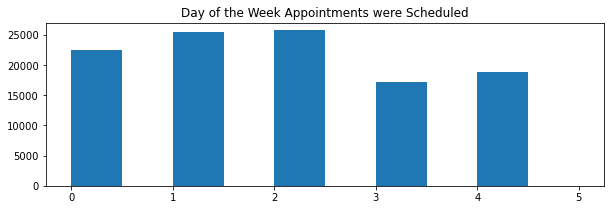

In [33]:
plt.figure(figsize = (10,3))
plt.hist(no_show["day_of_week"])
plt.title("Day of the Week Appointments were Scheduled")
plt.show()

Most of the appointments were scheduled from Monday to Friday with Monday to Wednesday being the busiest days.
Let's create a new dataframe to contain the difference in days between when an appointment was booked and the day the patient visited the hospital.

To know the effects of the time of booking has on meeting up with the appointment, let's get the difference between both time. The difference can be 0 or any other positive value but cannot be negative. If we encounter negative values (scheduling day greater than the actual appointment day, we would have to drop those rows)

In [13]:
# add a new dataframe which the difference between day the appointment was booked to the day the patient went.
no_show['dateDifference'] = no_show['appointmentday'] - no_show['scheduledday']
no_show['dateDifference'] = no_show['dateDifference'].astype('timedelta64[D]')

In [14]:
# check to see if there are negative values in time difference
no_show.dateDifference.unique()

array([ -1.,   1.,   2.,   0.,   3.,   8.,  28.,   9.,  22.,  10.,  17.,
        16.,  13.,  27.,  23.,  20.,  14.,  15.,  21.,  42.,  29.,  30.,
        41.,  31.,  55.,  44.,  45.,  38.,  36.,  37.,  43.,  49.,  59.,
        51.,  52.,  64.,  66.,  90.,  65.,  83.,  77.,  86., 114., 108.,
        62.,  69.,  71.,  56.,  57.,  50.,  58.,  40.,  48.,  72.,  63.,
        19.,  32.,  33.,   5.,  34.,  35.,  11.,  12.,  39.,  46.,   7.,
         4.,   6.,  24.,  25.,  47.,  26.,  18.,  60.,  54.,  61., 175.,
        53.,  76.,  68.,  82.,  75.,  88.,  80., 102.,  78.,  67.,  74.,
        84., 111.,  -2.,  79.,  85.,  97.,  93., 141., 154., 161., 168.,
       103., 132., 124.,  95.,  87.,  89., 150., 125., 126., 110., 118.,
        73.,  70.,  81., 107., 109., 101., 121., 100., 104.,  91.,  96.,
        92., 106.,  94.,  -7., 138., 131., 178., 116., 145., 122.])

In [15]:
# drop the row with negative time difference
no_show.drop(no_show[no_show["dateDifference"] < 0].index, inplace=True)

In [27]:
no_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,day_of_week,dateDifference
count,71409.000000,71409.000000,71409.000000,71409.000000,71409.000000,71409.000000,71409.000000,71409.000000,71409.000000,71409.000000
mean,38.509432,0.092691,0.208993,0.074766,0.025291,0.018051,0.496884,0.715484,1.872061,14.632217
std,22.939354,0.290002,0.406592,0.263016,0.157008,0.133137,0.499994,0.451187,1.369997,16.504069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,8.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,21.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,178.000000


In [18]:
# check to see how many rows are left
no_show.shape

(71409, 15)

After succeeding with getting the time difference and eliminating time that are negative. There are 71409 rows of value left to work with. Although majority of patients had 21 days before their appointment where some others either got their appointment that same day, or had to wait for 178 days, the average duration to wait from scheduling to being given an appointment is 15 days.

<a id='eda'></a>
## Exploratory Data Analysis

In [19]:
# create a mask for those who showed up and those who didn't
showed = no_show.showed_up == 1
no_showed = no_show.showed_up == 0

In [20]:
# get the count of those who made it and those who did not make it
no_show[showed].shape[0], no_show[no_showed].shape[0]

(51092, 20317)

In [21]:
no_show[no_showed].shape[0] / no_show.shape[0], no_show[showed].shape[0] / no_show.shape[0]

(0.28451595737232, 0.71548404262768)

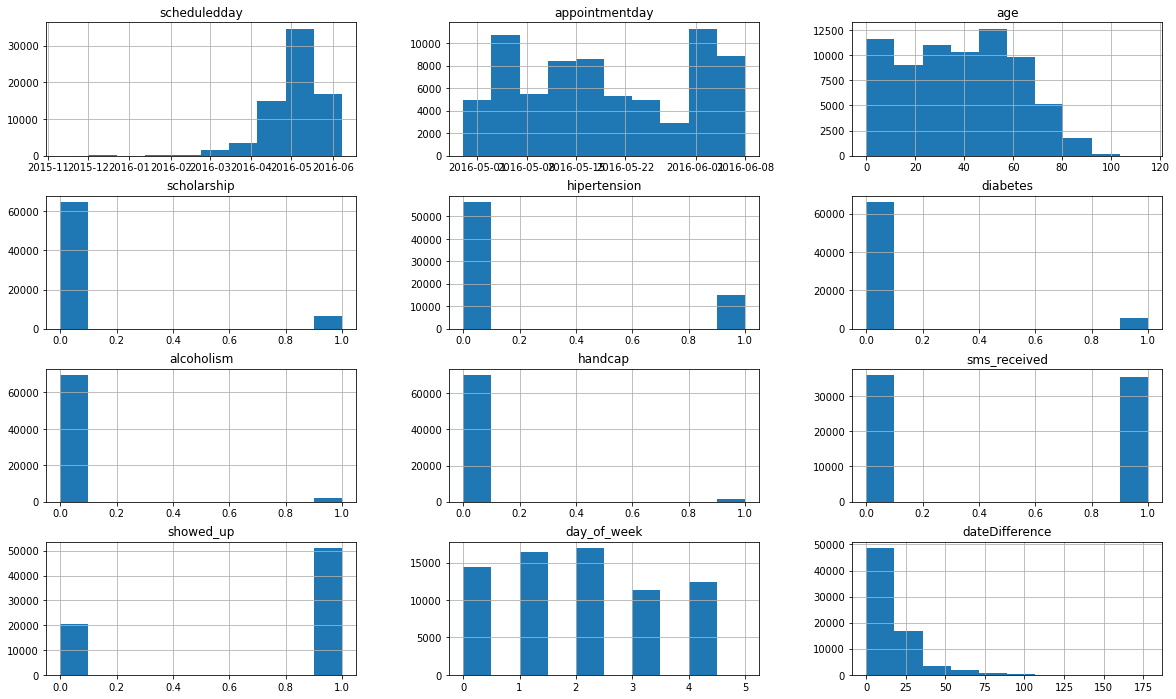

In [22]:
no_show.hist(figsize=(20,12));

- Majority of the patients are within 0 to 55 years of age
- A large proportion of them are not on scholarship The highest health condition are those with hypertension
- Majority of the patients did not receive SMS reminder for their appoinment
- A large percentage showed for their appointment
- Tuesday and Wednesday are peak days when most appointments were scheduled

### Research Question 1 : Does receiving SMS increase a patient's chance of making it to their appointment?

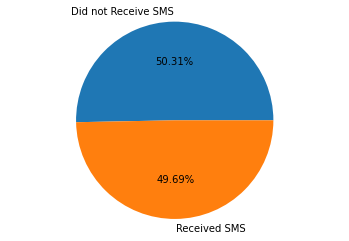

In [23]:
# plot of those who received sms to those who did not receive sms
plt.pie(no_show.sms_received.value_counts(), labels=['Did not Receive SMS', 'Received SMS'], autopct="%.2f%%")
plt.axis('equal');

From the pie chart, it can be seen that 50.31% of the population did not receive an SMS for their appointment, while 49.69% did received an SMS. Let us do further analysis into how many of those who got an SMS showed up and those who did not get an sms but yet made it to their appointment.

In [24]:
# create a mask for those who received sms and those who didn't 
not_received_sms = no_show.query("sms_received == 0")
received_sms = no_show.query("sms_received == 1")

In [25]:
no_show.groupby(['sms_received', 'showed_up'])['sms_received'].count()

sms_received  showed_up
0             0            10533
              1            25394
1             0             9784
              1            25698
Name: sms_received, dtype: int64

In [109]:
# calculate percentage that received sms but missed their appointment
sms_noshow = (9784/received_sms.value_counts().sum())*100
sms_noshow

27.574544839637

In [108]:
# calculate percentage that received sms and came for their appointment
sms_show = (25698/received_sms.value_counts().sum())*100
sms_show

72.425455160363

In [102]:
# calculate percentage that did not receive sms but missed their appointment
nosms_noshow = (10533/not_received_sms.value_counts().sum())*100
nosms_noshow

29.317783282767834

In [100]:
# calculate percentage that did not receive sms but came for their appointment
nosms_show = (25394/not_received_sms.value_counts().sum())*100
nosms_show

70.68221671723217

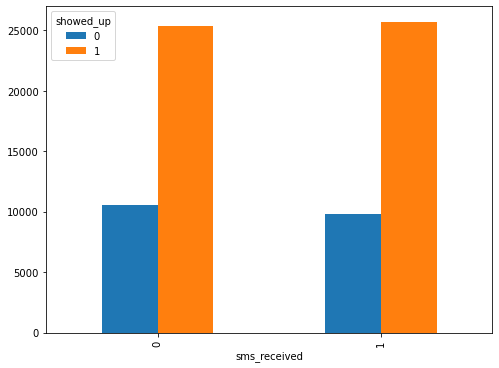

In [26]:
# create a plot of those showing up based on sms receipt
sms_showed = pd.crosstab(no_show.iloc[:,11],no_show.iloc[:,12])
sms_showed.plot(kind="bar", stacked=False, figsize=(8,6));

Of the 72% that came for the appointment, 49.69% received an SMS for their appointment.
Looking at the number that received an SMS for their appointment, 72% made it. In all, those that missed their appointments were more (29%) of those who did not receive an sms for their appointment compared to 28% that received SMS but missed the appointment.

In [38]:
# get those that received sms and showed up by gender
no_show.groupby(['gender','sms_received', 'showed_up'])['gender'].count()

gender  sms_received  showed_up
F       0             0             6824
                      1            16678
        1             0             6720
                      1            17482
M       0             0             3709
                      1             8716
        1             0             3064
                      1             8216
Name: gender, dtype: int64

Comparing those who received an SMS and came for their appointment by gender, it revealed that majority of those that received SMS made it.

In [39]:
# get those under the scholarship scheme that received sms and showed up
no_show.groupby(['scholarship','sms_received', 'showed_up'])['scholarship'].count()

scholarship  sms_received  showed_up
0            0             0             9405
                           1            23408
             1             0             8600
                           1            23377
1            0             0             1128
                           1             1986
             1             0             1184
                           1             2321
Name: scholarship, dtype: int64

The scholarship scheme was supposed to help the less priviledged take care of themselves medically and other benefits. However, majority of those who made it to their appointment (23408) despite not receiving SMS are not beneficiaries of the scholarship scheme of the government.

### Research Question 2 : Does the presence of a medical condition increase people's chances of meeting up with their appointments?

In [40]:
# function to plot each single conditions
def bar_plot(variable):

    # get feature
    var = no_show[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    proportion = varValue/no_show.shape[0]
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    print("{}:".format(proportion))

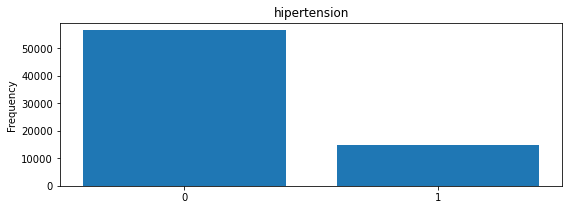

hipertension: 
 0    56485
1    14924
Name: hipertension, dtype: int64
0    0.791007
1    0.208993
Name: hipertension, dtype: float64:


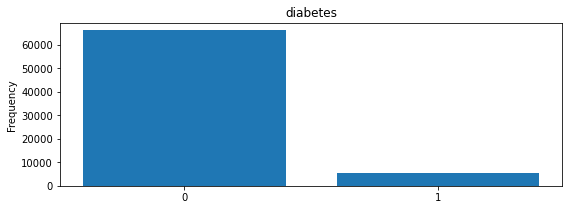

diabetes: 
 0    66070
1     5339
Name: diabetes, dtype: int64
0    0.925234
1    0.074766
Name: diabetes, dtype: float64:


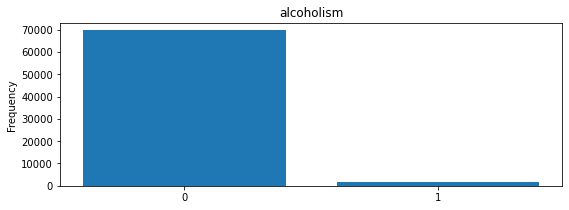

alcoholism: 
 0    69603
1     1806
Name: alcoholism, dtype: int64
0    0.974709
1    0.025291
Name: alcoholism, dtype: float64:


In [41]:
conditions = ["hipertension", "diabetes", "alcoholism"]
for c in conditions:
    bar_plot(c)

In [53]:
# function to get the groupings of the hypertensive condition given that they show up or not
def groupings(var):
    display = no_show.groupby([var, "showed_up"])[var].count()
    print(display)

groupings("hipertension")

hipertension  showed_up
0             0            16823
              1            39662
1             0             3494
              1            11430
Name: hipertension, dtype: int64


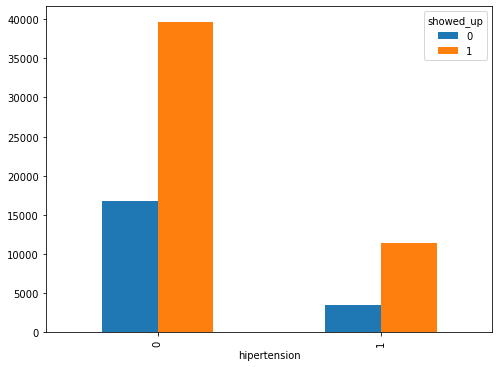

In [50]:
# create a plot of those showing up because they are hypertensive
hypertension = pd.crosstab(no_show.iloc[:,7],no_show.iloc[:,12])
hypertension.plot(kind="bar", stacked=False, figsize=(8,6));

In [45]:
# create a mask for those with hypertension
hyper = no_show.hipertension == 1
not_hyper = no_show.hipertension == 0

In [46]:
# get proportion of those with hypertension that showed up vs those who did not show up
no_show[hyper].shape[0] / no_show.shape[0], no_show[not_hyper].shape[0] / no_show.shape[0]

(0.2089932641543783, 0.7910067358456218)

In [115]:
# get the number of hypertensive patients who received an SMS made it or not
no_show.groupby(['hipertension', 'sms_received', 'showed_up'])['hipertension'].count()

hipertension  sms_received  showed_up
0             0             0             8584
                            1            19289
              1             0             8239
                            1            20373
1             0             0             1949
                            1             6105
              1             0             1545
                            1             5325
Name: hipertension, dtype: int64

In [122]:
# get the count of hypertensive patients showing up based on the interval of their appointment
no_show.groupby(['hipertension', 'time_interval', 'showed_up'])['hipertension'].count()

hipertension  time_interval  showed_up
0             1 week         0             6657
                             1            19224
              2 weeks        0             2907
                             1             6181
              3 weeks        0             2303
                             1             4516
              4 weeks        0             1898
                             1             3534
              > 1 month      0             3058
                             1             6207
1             1 week         0             1721
                             1             6689
              2 weeks        0              554
                             1             1459
              3 weeks        0              427
                             1             1232
              4 weeks        0              281
                             1              843
              > 1 month      0              511
                             1             1207
N

The interval affected hypertensive patients ability to make it to their appointment. Although it is clear that a large percentage of them always make it irrespective of the duration. 

In [116]:
# get the count of hypertensive patients based on their gender
no_show.groupby(['hipertension', 'gender'])['hipertension'].count()

hipertension  gender
0             F         37166
              M         19319
1             F         10538
              M          4386
Name: hipertension, dtype: int64

In [117]:
# count of hypertensive patients based on their gender made it or not to their appoinrment
no_show.groupby(['hipertension', 'gender', 'showed_up'])['hipertension'].count()

hipertension  gender  showed_up
0             F       0            11066
                      1            26100
              M       0             5757
                      1            13562
1             F       0             2478
                      1             8060
              M       0             1016
                      1             3370
Name: hipertension, dtype: int64

- At 19.7%, <mark>Hypertension</mark> is the most condition the patients have, followed by <mark>Diabetics</mark> at 7.1% and the least is <mark>Alcoholism</mark> at 3.0%. Thus, the bulk of the condition-based analysis is on hypertension.
- 10538 (71%) of the hypertensive patients are females.
- Out of 14924 hypertensive patients, 11430 made it to their appointment despite that 6105 of these people never got an SMS.

### Research Question 3 : Does time between booking an appointment and your given date affect the visit?

In [54]:
# create an interval of time.
# add a new dataframe called **time_interval** and apply the following function
def time_interval(var):
    if var < 0:
        return "Same Day"
    elif var <=7.0:
        return "1 week"
    elif var > 7.0 and var <= 14.0:
        return "2 weeks"
    elif var >14.0 and var <=21.0:
        return "3 weeks"
    elif var >21.0 and var <=28.0:
        return "4 weeks"
    else:
        return "> 1 month"

In [55]:
no_show["time_interval"]=no_show['dateDifference'].apply(time_interval)

In [83]:
no_show.time_interval.value_counts()

1 week       34291
2 weeks      11101
> 1 month    10983
3 weeks       8478
4 weeks       6556
Name: time_interval, dtype: int64

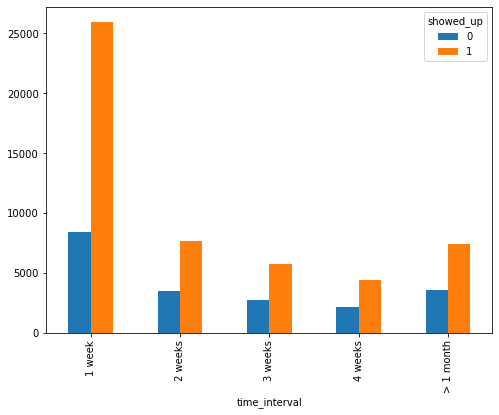

In [58]:
# create a plot of those showing up based on time interval
time_int = pd.crosstab(no_show.iloc[:,-1], no_show.iloc[:,12])
time_int.plot(kind="bar", stacked=False, figsize=(8,6));

In [59]:
# get those that received sms and showed up by time interval
no_show.groupby(['time_interval','sms_received', 'showed_up'])['time_interval'].count()

time_interval  sms_received  showed_up
1 week         0             0             5229
                             1            16074
               1             0             3149
                             1             9839
2 weeks        0             0             1611
                             1             3003
               1             0             1850
                             1             4637
3 weeks        0             0             1248
                             1             2224
               1             0             1482
                             1             3524
4 weeks        0             0              912
                             1             1448
               1             0             1267
                             1             2929
> 1 month      0             0             1533
                             1             2645
               1             0             2036
                             1             4769
N

In [113]:
# get the proportion of those that showed up given the time interval in percentage
g = no_show.groupby('time_interval')['showed_up']
timeframe = pd.concat([g.value_counts(), g.value_counts().div(71409)], axis=1, keys=('counts','percentage'))
print (timeframe)

                         counts  percentage
time_interval showed_up                    
1 week        1           25913    0.362881
              0            8378    0.117324
2 weeks       1            7640    0.106989
              0            3461    0.048467
3 weeks       1            5748    0.080494
              0            2730    0.038230
4 weeks       1            4377    0.061295
              0            2179    0.030514
> 1 month     1            7414    0.103824
              0            3569    0.049980


In [114]:
# getting the percentage of those who showed up within the time interval given that they got SMS
g = no_show.groupby(['time_interval', 'sms_received'])['showed_up']
timeframe = pd.concat([g.value_counts(), g.value_counts().div(71409)], axis=1, keys=('counts','percentage'))
print (timeframe)

                                      counts  percentage
time_interval sms_received showed_up                    
1 week        0            1           16074    0.225098
                           0            5229    0.073226
              1            1            9839    0.137784
                           0            3149    0.044098
2 weeks       0            1            3003    0.042054
                           0            1611    0.022560
              1            1            4637    0.064936
                           0            1850    0.025907
3 weeks       0            1            2224    0.031145
                           0            1248    0.017477
              1            1            3524    0.049350
                           0            1482    0.020754
4 weeks       0            1            1448    0.020278
                           0             912    0.012771
              1            1            2929    0.041017
                           0   

A large portion of the appointments were scheduled within one week (48%). There are those who were scheduled for more than one month (14%). The long appointment duration might be due to the nature of their illness and the number of those seeking the same attention; given limited medical equipment and personnels. However, about 5 percentage of the long duration made it to their appointment whereas 36 percentage of the within one week interval made it.

The SMS delivery enabled a large percentage of the one week intervals to show up. This SMS might be seen as a confirmation of their appointment. Also, the intervals of more than one month mad it more when sent an sms for their appointment.

<a id='conclusions'></a>
## Conclusions
From the analysis done so far, one can conclude that:
- Sending an SMS can increase can increase patient's chances of making it for their appointment.
- Patients honour their appointments during weekdays with Monday through Wednesday being the peak days of their appearance.
- Having a condition (hypertension here) contributed a lot to making it to the appointment.
- The time interval between when an appointment was created an when the patient is to visit the clinic also matters. The longer the interval, the lesser the chances of making it for the appointment.


### Limitations
- Couldn't determine if distance to the clinic is a factor to missing their appointment due to insufficient data on patient's location and distance from the clinic.
- SMS was sent to patient's but we were not told if they were sent as reminders or sent the same day they booked the appointment as a confirmation. Having this could help us explore further for best interval to send reminders.

### References
- [Stackoverflow on getting counts](
https://stackoverflow.com/questions/50169311/getting-percentage-and-count-python)
- [Plotting multiple variables using a function](https://github.com/ndcharles/SGA08_DATASCI/blob/master/titanic_dataset.ipynb)
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Pandas Indexing](https://pandas.pydata.org/docs/user_guide/indexing.html)